In [1]:
# imports
import pandas as pd
import dsbhelper
import numpy as np
from matplotlib import pyplot as plt
import cv2
from sklearn.cluster import KMeans
from sklearn import preprocessing
import random
import utils
import pylab

/Users/farrar/py3/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
# constants
TRAIN = './stage1_train'
TEST = './stage1_test'
train_specimen_ids = dsbhelper.get_specimen_ids(TRAIN)

<H2>Mirror Edges</H2>

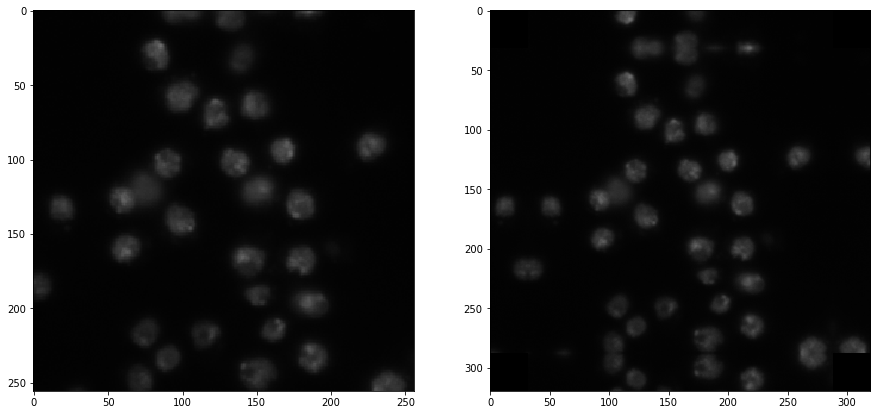

In [3]:
def mirror_edges(image, is_mask=False, mirror_width=32):
    
    # create blank new image
    if is_mask:
        new_image = np.zeros((image.shape[0] + (2*mirror_width), image.shape[1] + (2*mirror_width)), dtype=np.uint8)
    else:
        new_image = np.zeros((image.shape[0] + (2*mirror_width), image.shape[1] + (2*mirror_width), 3), dtype=np.uint8)
    
    # make it white for testing
    #new_image = new_image + 255 
    
    # get edge panes
    left = image[:, :mirror_width]
    right = image[:, image.shape[1]-mirror_width:image.shape[1]]
    top = image[:mirror_width, :]
    bottom = image[image.shape[0]-mirror_width:image.shape[0]]
    
    # assemble new image
    new_image[mirror_width:mirror_width+image.shape[0], :mirror_width] = np.fliplr(left)
    new_image[mirror_width:mirror_width+image.shape[0], new_image.shape[1]-mirror_width:new_image.shape[1]] = np.fliplr(right)
    new_image[:mirror_width, mirror_width:mirror_width+image.shape[1]] = np.flipud(top)
    new_image[new_image.shape[0]-mirror_width:new_image.shape[1], mirror_width:mirror_width+image.shape[1]] = np.flipud(bottom)
    new_image[mirror_width:mirror_width+image.shape[0],mirror_width:mirror_width+image.shape[1]] = image
    
    return new_image

# unit test --------------------------------------------
specimen_id = random.choice(train_specimen_ids)
image = dsbhelper.get_specimen_image(TRAIN, specimen_id)
new_image = mirror_edges(image)
fig, axarr = plt.subplots(nrows=1, ncols=2, figsize=(15,15))
axarr[0].imshow(image)
axarr[1].imshow(new_image)

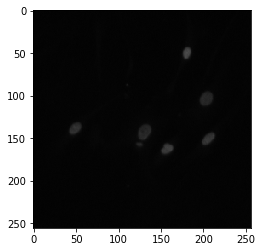

In [5]:
specimen_id = '0114f484a16c152baa2d82fdd43740880a762c93f436c8988ac461c5c9dbe7d5'
image = dsbhelper.get_specimen_image(TEST, specimen_id)
plt.imshow(image)

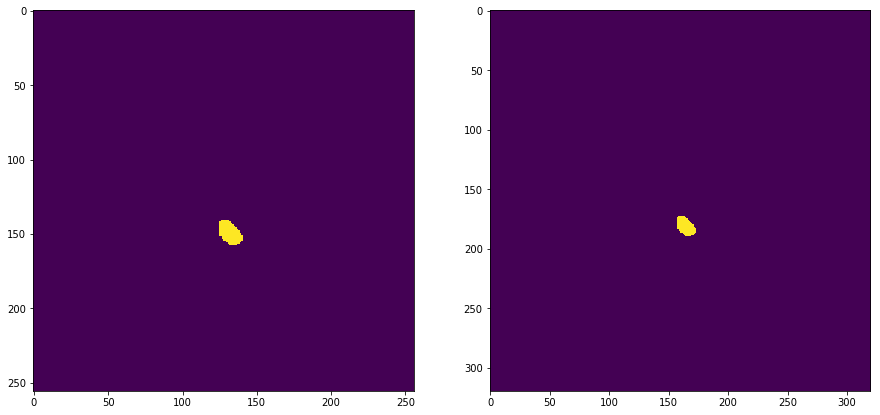

In [4]:
# test with mask
masks = dsbhelper.get_specimen_masks(TRAIN, specimen_id)
new_mask = mirror_edges(masks[0], is_mask=True)
fig, axarr = plt.subplots(nrows=1, ncols=2, figsize=(15,15))
axarr[0].imshow(masks[0])
axarr[1].imshow(new_mask)

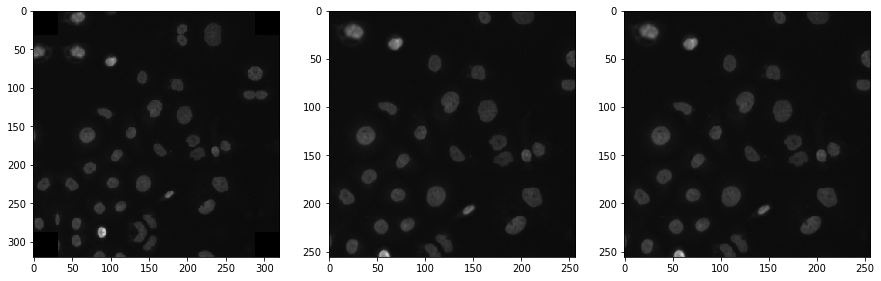

In [5]:
def crop_mirror(image, mirror_width=32):
    return image[mirror_width:image.shape[0]-mirror_width, mirror_width:image.shape[1]-mirror_width]

# unit test ---------------------------------------
cropped_image = crop_mirror(new_image)
fig, axarr = plt.subplots(nrows=1, ncols=3, figsize=(15,15))
axarr[0].imshow(new_image)
axarr[1].imshow(cropped_image)
axarr[2].imshow(image)

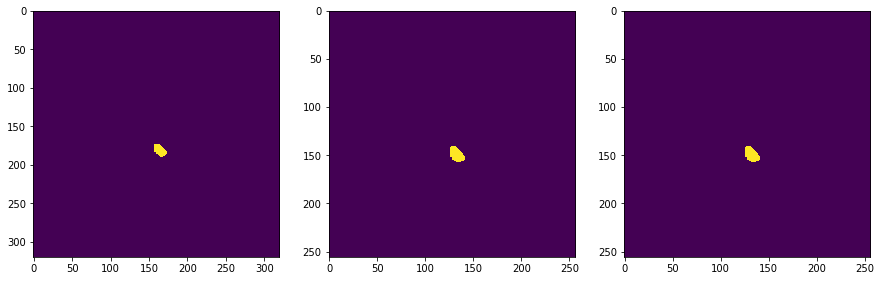

In [6]:
#test with mask
cropped_mask = crop_mirror(new_mask)
fig, axarr = plt.subplots(nrows=1, ncols=3, figsize=(15,15))
axarr[0].imshow(new_mask)
axarr[1].imshow(cropped_mask)
axarr[2].imshow(masks[0])